# Cluster Analysis using KMeans Algorithm

Changing Directory to the Directory where the file was saved

In [134]:
import os
os.chdir("D:\Machine_Learning")

# Importing Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 Loading the "driver_data" dataset 

In [136]:
data = pd.read_csv("D:\Machine_Learning\driver_data.csv")

# Data Preprocessing - Feature Scaling 

In [137]:
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


* Feature 1 is the Distance_Feature it represents the mean distance driven by driver per day
* Feature 2 is the Speeding_Feature it represnts the mean percentage of time a driver was >5mph over the speed limit
* we can clearly say that Distance_Feature has high values than Speeding_Feature because mean Distance covered by the driver always have high values than mean percentage of time a driver over the speed limit.
* Fearure 1 has values on a scale 1-250 and Feature 2 has a values on a scale 1-100
* so we need to perform Feature scaling by standardizing the data

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [139]:
data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


* summary statistics
    * we have 4000 records of drivers data and for each driver we have 2 features 
    * The average distance covered by a driver per day is 76 miles
    * Minimum distance covered by a driver per day is 15.52 miles
    * Maximum distance covered by a driver per day is 244.79 miles
    * on a Average, 10% of the time a driver was >5mph over the speed limit
    * Even some records showing some of the drivers were completely neglecting the speed limit 


# Feature scaling by Standardization method

* Standardization:
    * In cluster analysis, standardization is especially crucial in order to compare similarities between features based on certain distance measures
    * Feature Standardization makes the values of each feature in the data have zero-mean(when subtracting the mean in the numerator) and unit-variance

# Importing StandardScaler class from the sklearn.preprocessing package

In [140]:
from sklearn.preprocessing import StandardScaler

# creating an object for StandardScaler class and fitting the data by calling fit()

In [141]:
std_scale = StandardScaler().fit(data)

# call the transform function on returned variable to get scaled output

In [142]:
data_scaled = std_scale.transform(data)

In [143]:
data_scaled[:5,]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351]])

# Import KMeans funtion from sklearn under cluster class

In [144]:
from sklearn.cluster import KMeans

# Finding an optimal number of clusters using Elbow method

* Elbow method:
     * It is used to find the optimal value of K is to compare the resulting SSQ of multiple runs of K-means algorithm with different K-values and choose the best one(having minimum SSQ)
     
     * we can do this by plotting the K value vs SSQ values and picking the optimal value for K from the graph called "Scree plot"
     
     * using "Elbow method" we can look to find a "bend" or "elbow point" in the graph so that we can select the optimum number of clusters

In [145]:
ssq=[]

for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(data_scaled)
    ssq.append(kmeans_model.inertia_)

* Here, we are taking the range of clusters from (1-11)
* Applying KMeans function for the range of clusters K
* fitting the KMeans model by calling fit()(fit function) on scaled data



# Inertia

* for each K-Means fitted model, Scikit-Learn provides a variable called "inertia_" that has the value of total within-cluster SSE(sum of squared errors) we can directly plot this values against the corresponding K to visualize and we can see that plot in "Scree plot"
* For each K value the respective model.inertia_ is added and we can store those values in ssq[] as shown in above code

# Sum of squares(SSQ) based on number of clusters is shown below

In [146]:
ssq

[8000.0,
 3911.926390428416,
 1756.544582131428,
 739.1534508645581,
 619.4037594867996,
 502.1189726386458,
 438.72533434085574,
 374.48486744081345,
 338.5024481231581,
 309.6352807109199]

# Generate Scree plot

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

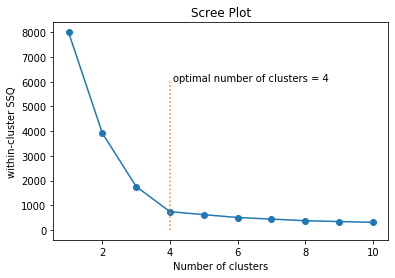

In [148]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([4]*6000, range(1,6001), ":")
plt.text(4.1, 6001, "optimal number of clusters = 4")
plt.show()

# Finding optimal number of clusters using Elbow method

* As the Number of clusters(K) increases we can see that within-cluster SSQ decreases because when number of clusters increases the distance between the datapoints in the cluster and the cenroid of the cluster decreases as as result Sum of Squares decreases

* Scree plot shows that initially the SSQ decreases rapidly with increase of number of clusters and after that it decreased gradually and plateud.

* using "Elbow-method" we can see a slide bend at cluster-4(k=4) because it is having low error without having to perform a large number of clusters

* we can clearly say that for more than 4 number of clusters the scree plot shows that there is very little change in SSQ and also at K=4 "elbow method" shows as "Elbow point" or "bend"  so optimal number of clusters (k=4)

     

# Fit the KMeans model with K=4

In [149]:
 km = KMeans(n_clusters=4, random_state=123)

In [150]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

# Important input parameters of KMeans function

* n_clusters : desired number of clusters( in our case 4)
* init : "random" for random initial cluster assignments, we can also pass a custom start point for centroids of our clusters, Scikit-Learn also supports an advanced initialization method called "kmean++"
* n_init : number of times KMeans should run with new initial assignment assignment of clusters(default 10)
* max_iter : Maximum number of iteration in each run of KMeans. Algorithm will stop earlier if it has converged to a solution. in our case max_iter=300
* tol : tolerance in inertia value. 0.0001 is minimum change in inertia value that successive KMeans runs should reduce. tol=0.0001 ensures that out algorithm doesn't keep running without any substantial decrease in inertia

# labels_ : predicted cluster labels

* Make predictions for the clusters of the given dataset

In [151]:
predicted_cluster = km.predict(data_scaled)

In [152]:
predicted_cluster[:5]

array([2, 2, 2, 2, 2])

# Plot the data partitioned into clusters

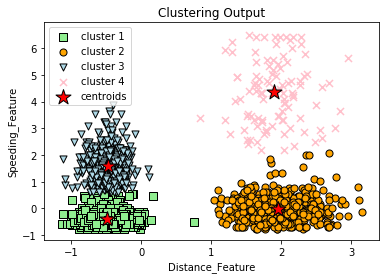

In [153]:
plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1,1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2,1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(data_scaled[predicted_cluster==3,0], data_scaled[predicted_cluster==3,1], s=50, c='pink', marker='x', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red', marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

# Summary of Clustering output

* In the clustering output we can see four clusters or four groups of data points. 
* Each group is represented with different colour from one another and Each group has its own centroid which is shown in red colour
* In each Cluster, the Intra-Cluster distance is very small and Inter-cluster distances are somewaht large 
* we can see that cluster 1 and cluster 3 are very close on the other hand cluster 4 is somewhat scatterred and cluster 2 is holding the datapoints tightly

# Interpretation of resulting clusters

* we could interpret the four clusters seen above as(From left to right)
     * Cluster 1: 
         * Group of Delivery fleet Drivers with low mean distance driven per day and also the mean percentage of time a driver was >5mph over the speed limit is very low. In other words, the delivery fleet drivers those are not crossing the speed limit over by 5mph covering low distance for deliveries per day
    
     * Cluster 3 : 
         * Group of Delivery fleet Drivers having low mean distance driven per day but the mean percentage of time a driver was >5mph over the speed limit is high(from 1% to 4%). In other words, the delivery fleet drivers even they are crossing the speed limit over by 5mph still failed to cover more distance for deliveries per day(mean distance driven per day is still low)
    
     * Cluster 2: 
         * Group of Delivery fleet drivers with high mean distance driven per day with very low mean percentage of time a driver was >5mph over the speed limit. In other words,  very few drivers in this group crossed the speed limit by >5mph and most of the drivers without crossing the speed limit by 5mph but still managed to cover a large distance for deliveries per day
    
     * Cluster 4 :
         * Group of Delivery fleet drivers having both mean distance driven per day and mean percentage of time a driver was >5mph over the speed limit is very high. In other words, these drivers corssed the speed limit over by >5mph to cover a large distance to deliver the items ped day

# We can conclude the following labels for each cluster:

* Cluster 1: Group of Drivers driven small distance and consious to speed limit
* Cluster 3: Group of Drivers not consious to speed limit but still covers small distance
* Cluster 2: Group of Drivers driven large distance and also consious to speed limit
* Cluster 4: Group of Drivers covers large distance but not consious to speed limit

# inertia_

* total within-cluster sum of squares(SSQ) value for the final model

In [154]:
km.inertia_

739.1534508645581

# Claculate the Silhouette score using Scikit-Learn's metrics class

In [155]:
from sklearn.metrics import silhouette_score

The input parameters for the silhouette_score are scaled data and the predicted clusters for our dataset

In [156]:
silhouette_score(data_scaled, predicted_cluster)

0.7843727073779272

The silhouette_score is close to 1 it indicates that the clusering configuration is appropriate

# Visualize the cluster output

In [157]:
import seaborn as sns

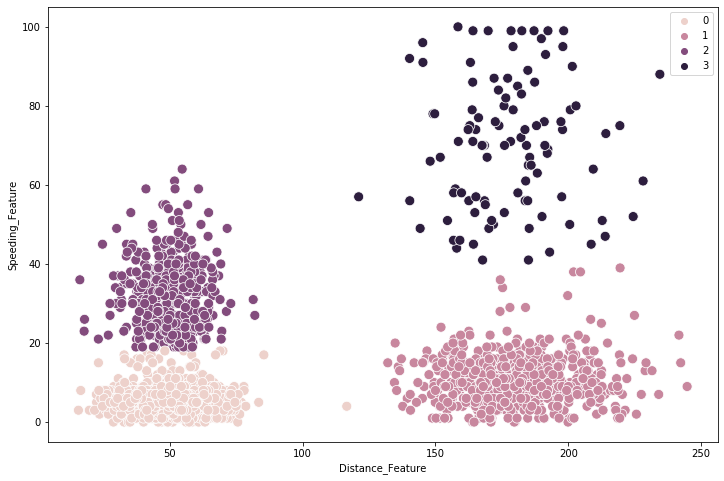

In [158]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue=predicted_cluster, s=100)
plt.show()

From the output we see that a Delivery fleet driver falls into one of 4 clusters based on Distance_Feature and Speeding_Feature 

# Reason for not choosing any other number clusters

let's perform KMeans clustering for 3 number of clusters 

In [159]:
km = KMeans(n_clusters=3, random_state=123)

In [160]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [161]:
predicted_cluster = km.predict(data_scaled)

In [162]:
predicted_cluster[:5]

array([2, 1, 2, 1, 1])

# Plot the data partitioned into clusters

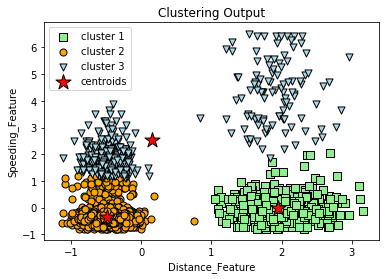

In [163]:
plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1,1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2,1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red', marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

# Reason for not to choose Optimal number of clusters(K=3)

* For 3 number of clusters, Even the centroid is not assigned properly , we can clearly observe from the Clustering output, the centroids of clusters are not in the middle of the cluster and also the distance between the centroid of the cluster and the datapoints in the respective cluster is high
* so, result the sumofsquares(SSQ) of 3 number of clusters(k=3) is also high when compared to 4 number of clusters(k=4)

As number of clusters increases the SSQ value decreases but here we have less number of clusters and also the centroids are not well positioned for (k=3) so this model have very high value of inertia_

In [164]:
km.inertia_

1756.544582131428

# perform KMeans clustering for 5 number of clusters

In [165]:
km = KMeans(n_clusters=5, random_state=123)

In [166]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [167]:
predicted_cluster = km.predict(data_scaled)

In [168]:
predicted_cluster[:5]

array([4, 4, 4, 4, 4])

# Plot the data partitioned into clusters

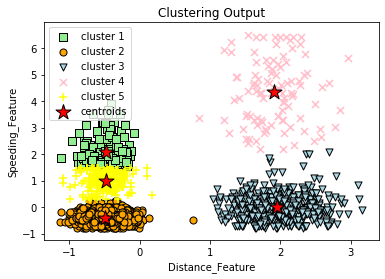

In [169]:
plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1,1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2,1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(data_scaled[predicted_cluster==3,0], data_scaled[predicted_cluster==3,1], s=50, c='pink', marker='x', edgecolor='black', label='cluster 4')
plt.scatter(data_scaled[predicted_cluster==4,0], data_scaled[predicted_cluster==4,1], s=50, c='yellow', marker='+', edgecolor='black', label='cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red', marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

# Reason for not choosing the number of clusters (K=5)

* As we know that, as number of clusters increases the SSQ value decreases bacause the distance between the clusters centoird and datapoints with in the cluster are very low in other words, the centroid is very close to the datapoints within the cluster
* In the clustered ouput, we can clearly observe that the clusters 1,2,5 are completely overlapped so the distance between the clusters centroid and datapoints within the cluster are very small when compared to less number of clusters so this is the reason that for the low SumofSquares(SSQ) value in 5 number of clusters(K=5)
* We need to choose an optimal number of clusters so we select 4 number of clusters(K=4) instead of 5 number of clusters(K=5)

As number of clusters increases the SSQ value is low that is why inertia_ value for this model is low.

In [170]:
km.inertia_

619.4037594867996

# Perform the KMeans clustering for 6 number of clusters

In [171]:
km = KMeans(n_clusters=6, random_state=123)

In [172]:
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [173]:
predicted_cluster = km.predict(data_scaled)

In [174]:
predicted_cluster[:5]

array([4, 4, 4, 4, 4])

# Plot the data partitioned into clusters

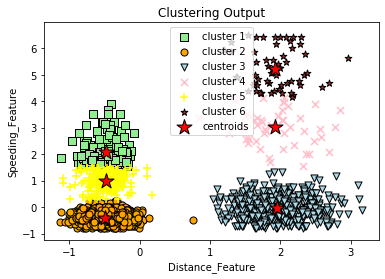

In [175]:
plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1,1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2,1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(data_scaled[predicted_cluster==3,0], data_scaled[predicted_cluster==3,1], s=50, c='pink', marker='x', edgecolor='black', label='cluster 4')
plt.scatter(data_scaled[predicted_cluster==4,0], data_scaled[predicted_cluster==4,1], s=50, c='yellow', marker='+', edgecolor='black', label='cluster 5')
plt.scatter(data_scaled[predicted_cluster==5,0], data_scaled[predicted_cluster==5,1], s=50, c='brown', marker='*', edgecolor='black', label='cluster 6')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red', marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

# Reason for not choosing the Number of clusters(K=6)

* As we know that, as number of clusters increases the SSQ value decreases bacause the distance between the clusters centoird and datapoints with in the cluster are very low in other words, the centroid is very close to the datapoints within the cluster
* In the clustered ouput, we can clearly observe that the clusters 1,2,5 are completely overlapped  and also clusters 6&4 are also overlapped, so the distance between the clusters centroid and datapoints within the cluster are very small when compared to less number of clusters so this is the reason that for the low SumofSquares(SSQ) value in 6 number of clusters(K=6)
* We need to choose an optimal number of clusters so we select 4 number of clusters(K=4) instead of 5 number of clusters(K=6)

As number of clusters increases the SSQ value is low that is why inertia_ value for this model is low.

In [176]:
km.inertia_

502.1189726386458

# Hierarchical Clustering using Scikit-Learn

Create dendogram for the "drivers_data" using Scipy

Importing linkage and dendogram from scipy.cluster.hierarchy class

In [177]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

Make dendogram black

In [178]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

# Creating Linkage

Parameters for linkage:
   * the data we want to use
   * the linkage method we want to use(we have choosen 'ward method')
   * and the distance metric we want to use(we have choosen 'euclidean distance metric')

In [179]:
link = linkage(data_scaled, method='ward', metric='euclidean')

# Plotting the dendrogram using Linkage variable

A dendrogram is a visual represntation of the observations and the hierarchy of clusters to which they belong

To plot a dendrogram we have to pass the linkage variable 

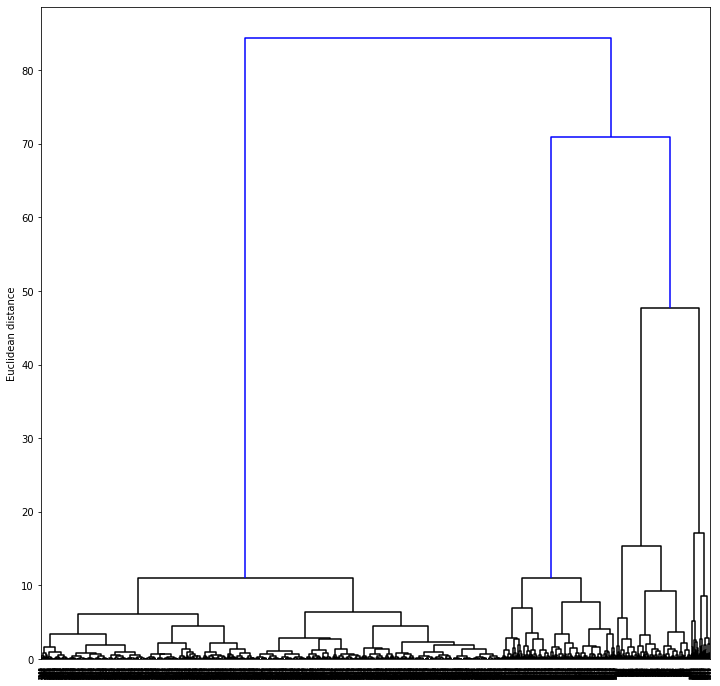

In [180]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

# Interpreting the dendrogram

* The above dendrogram shows a visual represntation of the observations and the hierarchy of clusters to which they belong
* We start from bottom where all of the observations are in a cluster of their own
* We can say that, similar clusters are grouped together these are represented by fusing together the clusters into one branch
* the height at which the branch is formed is directly related to how similar the observations soo for the four clusters above in dendrogram based on the similarities between the observation in the clusters the heaight of the branch(euclidean distance) tells.
* As a rule of thumb, we can cut the dendrogram where the gap between two successive combination similarities is largest. In the above dendrogram, we can make this cut for 4 clusters

# Agglomerative Clustering

* This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy


Importing AgglomerativeClustering class from sklearn.cluster module

In [181]:
from sklearn.cluster import AgglomerativeClustering

we have to pass the number of clusters(n_clusters) as a parameter to AgglomerativeClustering
* In our case we have choosen the 4 clusters so we have to pass n_clusters=4 as shown below

In [182]:
model = AgglomerativeClustering(n_clusters=4)

In [183]:
model.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

Important function parameters include:
   * n_clusters: The number of clusters to find(i=In our case n_clusters=4)
   * affinity: The distance metric, we have choosen 'euclidean' distance metrics
   * linkage: The linkage criteria to use, we have choosen 'ward' linkage

Check out the cluster predictions made by the model for our dataset

In [184]:
model.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

# Importing silhouette_score from sklearn.metrics class

In [185]:
from sklearn.metrics import silhouette_score

# Silhouette coefficient:

* it is used to evaluate the quality of a clustering algorithm. it is a measure of how well each object lies within its cluster

In [186]:
silhouette_score(data_scaled, model.labels_)

0.778897040913367

The silhouette_score is close to 1 it indicates that the clusering configuration is appropriate

# Visualizing the cluster output

In [187]:
import seaborn as sns

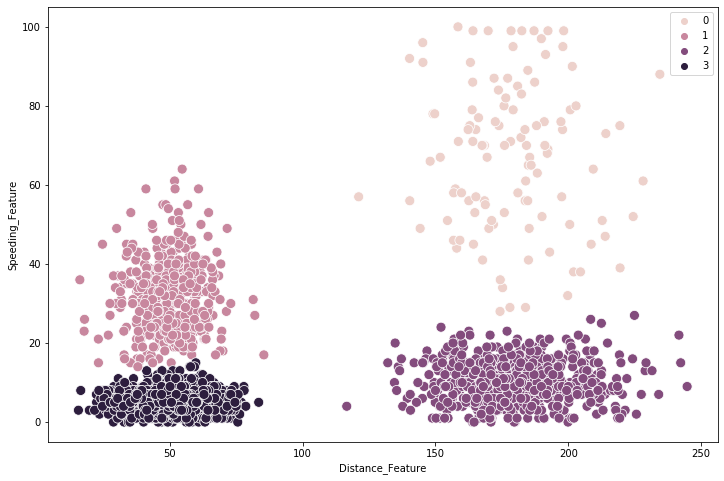

In [188]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue=model.labels_, s=100)
plt.show()

from the output we see that a delivery fleet driver falls into one of 4 clusters based on Distance_Feature and Speeding_Feature

# Comparison among the two model based on Silhoutte score

Importing silhouette_score from sklearn.metrics class

In [189]:
from sklearn.metrics import silhouette_score

Silhouette coefficient:
   * it is used to evaluate the quality of a clustering algorithm. it is a measure of how well each object lies within its cluster


# Silhouette_score for KMeans Clustering

The input parameters for the silhouette_score are scaled data and the predicted clusters for our dataset

In [190]:
silhouette_score(data_scaled, predicted_cluster)

0.7338749612229495

The silhouette_score is close to 1 it indicates that the clusering configuration is appropriate

# Visualize the cluster output

In [191]:
import seaborn as sns

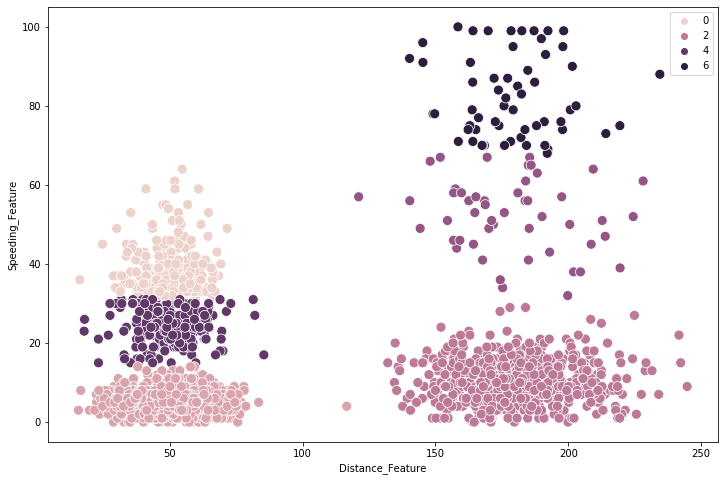

In [192]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue=predicted_cluster, s=100)
plt.show()

From the output we see that a Delivery fleet driver falls into one of 4 clusters based on Distance_Feature and Speeding_Feature

# Silhouette_score for Hierarchical Clustering

In [193]:
silhouette_score(data_scaled, model.labels_)

0.778897040913367

The silhouette_score is close to 1 it indicates that the clusering configuration is appropriate

# Visualizing the cluster output

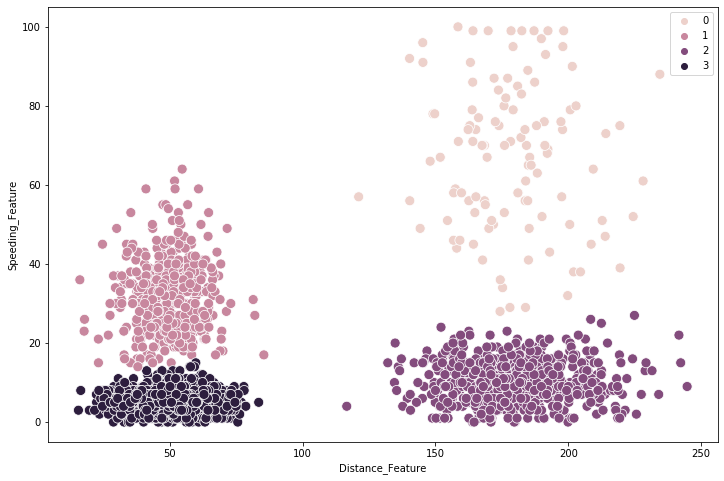

In [194]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue=model.labels_, s=100)
plt.show()

from the output we see that a delivery fleet driver falls into one of 4 clusters based on Distance_Feature and Speeding_Feature

# Comparing the results among the 2 models by using Silhouette_scores 

* so the Silhouette_score for KMeans Clustering = 0.7843 and Silhouette_score for Hierarchical Clustering = 0.7788 
* so based on the Silhouette_score we can say that Kmeans Clustreing is superior than the Hierarchical Clustering and also the clustering of groups also more clear in KMeans than Hierarchical clustering
* KMeans is Computationally faster than the Hierarchical clustering
* KMeans preoduces tighter clusters than Hierarchical clustering
* but the only disadvantage of KMeans Clustering is that we have to give number of clusters initially where as In Hierarchical clustering there is no need to give initial clusters we can get the optimal number of clusters by cutting the dendrogram based on thumb rule where the gap between two successive combination similarities is largest. whereas in KMeans clustering we have to obtain optimal number of cluster based on 'elbow method'


# Conclusion: KMeans Clustering is superior than the Hierarchical Clusetering